**EDA**

In [6]:
# Importing libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
# Reading the csv file
df = pd.read_csv('labeled_data.csv')

In [8]:
# Displaying the first 5 rows
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...


In [9]:
# Display the missing values in each column
df.isnull().sum()

,0
Unnamed: 0,0
count,0
hate_speech,0
offensive_language,0
neither,0
class,0
tweet,0


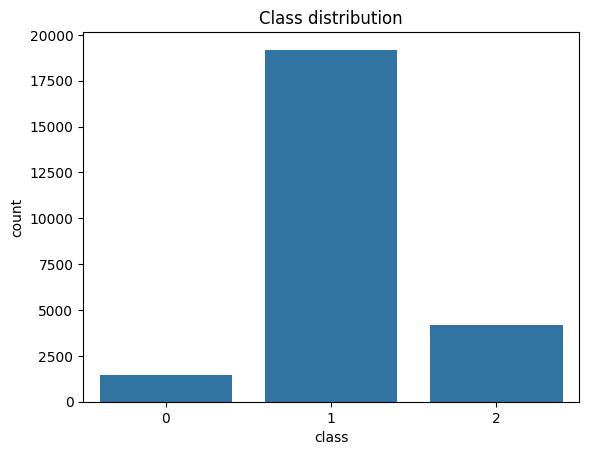

In [10]:
# Visualizing the distribution of the 'class' column
sns.countplot(x='class', data=df)
plt.title('Class distribution')
plt.show()

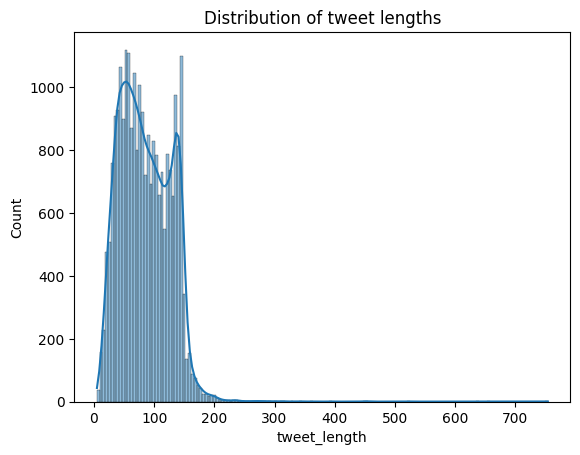

In [11]:
# Creating a new column 'tweet_length'
df['tweet_length'] = df['tweet'].apply(len)

# Visualizing the distribution of 'tweet length', with a kernel density estimate (kde) overlaid
sns.histplot(df['tweet_length'], kde=True)
plt.title('Distribution of tweet lengths')
plt.show()

**Data preprocessing**

In [12]:
# Importing libraries
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [13]:
# Downloading the list of stopwords and lexical database from the NLTK library
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [14]:
# Cleaning the dataset
def clean_tweet(tweet):
    tweet = re.sub(r'http\S+', '', tweet)  # Remove URLs
    tweet = re.sub(r'@\w+', '', tweet)     # Remove mentions
    tweet = re.sub(r'#\w+', '', tweet)     # Remove hashtags
    tweet = re.sub(r'\d+', '', tweet)      # Remove digits
    tweet = tweet.lower()                  # Convert to lowercase
    tweet = re.sub(r'\W', ' ', tweet)      # Remove non-word characters
    tweet = re.sub(r'\s+', ' ', tweet)     # Remove extra spaces
    return tweet

df['clean_tweet'] = df['tweet'].apply(clean_tweet)

In [15]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,clean_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,rt as a woman you shouldn t complain about cl...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,rt boy dats cold tyga dwn bad for cuffin dat ...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,rt dawg rt you ever fuck a bitch and she star...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,rt she look like a tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,rt the shit you hear about me might be true o...


In [16]:
# Creating a set of English stopwords
stop_words = set(stopwords.words('english'))

# Initializing the WordNetLemmatizer from the NLTK library for lemmatizing words
lemmatizer = WordNetLemmatizer()

In [18]:
# Defining a function to preprocess a tweet
def preprocess_tweet(tweet):
    words = tweet.split() # Splitting the tweet into individual words
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words] # Lemmatizing each word and removing stopwords
    return ' '.join(words) # Joining the processed words back into a single string

df['processed_tweet'] = df['clean_tweet'].apply(preprocess_tweet)

In [19]:
df.head()

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet,tweet_length,clean_tweet,processed_tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...,140,rt as a woman you shouldn t complain about cl...,rt woman complain cleaning house amp man alway...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,85,rt boy dats cold tyga dwn bad for cuffin dat ...,rt boy dat cold tyga dwn bad cuffin dat hoe st...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,120,rt dawg rt you ever fuck a bitch and she star...,rt dawg rt ever fuck bitch start cry confused ...
3,3,3,0,2,1,1,!!!!!!!!! RT @C_G_Anderson: @viva_based she lo...,62,rt she look like a tranny,rt look like tranny
4,4,6,0,6,0,1,!!!!!!!!!!!!! RT @ShenikaRoberts: The shit you...,137,rt the shit you hear about me might be true o...,rt shit hear might true might faker bitch told ya


In [20]:
# Defining the maximum number of words to consider in the tokenizer
max_words = 10000
# Defining the maximum length of sequences (tweets) after padding
max_len = 100

tokenizer = Tokenizer(num_words=max_words) # Initializing the Tokenizer to only consider the top 'max_words' most frequent words
tokenizer.fit_on_texts(df['processed_tweet']) # Building the word index
sequences = tokenizer.texts_to_sequences(df['processed_tweet']) # Converting the text data to sequences of integers based on the word index
padded_sequences = pad_sequences(sequences, maxlen=max_len) # Padding the sequences to ensure they all have the same length

In [21]:
X = padded_sequences # Initializing input variable
y = df['class'] # Initializing target variable

In [22]:
# Train test split that ensures that the split maintains the same class distribution in both training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

**Building a model**

In [23]:
# Importing libraries
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout

In [24]:
# Building a model, more explanation in documentation
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=128, input_length=max_len))
model.add(LSTM(128, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(3, activation='softmax'))

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [25]:
# Compiling the model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [26]:
# Training the model
history = model.fit(X_train, y_train, epochs=20, batch_size=32, validation_split=0.2)

Epoch 1/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 121s 236ms/step - accuracy: 0.8151 - loss: 0.5255 - val_accuracy: 0.9115 - val_loss: 0.2559
Epoch 2/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 109s 219ms/step - accuracy: 0.9222 - loss: 0.2272 - val_accuracy: 0.9065 - val_loss: 0.2511
Epoch 3/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 144s 225ms/step - accuracy: 0.9462 - loss: 0.1564 - val_accuracy: 0.8951 - val_loss: 0.3250
Epoch 4/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 144s 229ms/step - accuracy: 0.9580 - loss: 0.1184 - val_accuracy: 0.8964 - val_loss: 0.3436
Epoch 5/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.9670 - loss: 0.0918 - val_accuracy: 0.8880 - val_loss: 0.4343
Epoch 6/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 141s 217ms/step - accuracy: 0.9740 - loss: 0.0719 - val_accuracy: 0.8638 - val_loss: 0.5467
Epoch 7/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 140s 213ms/step - accuracy: 0.9773 - loss: 0.0616 - val_accuracy: 0.8807 - val_loss: 0.5767
Epoch 8/20
496/496 ━━━━━━━━━━━━━━━━━━━━ 146s 221ms/step - accuracy: 0.9796 -

**Model Evaluation**

In [27]:
# Evaluating the model
loss, accuracy = model.evaluate(X_test, y_test)
print(f'Test Accuracy: {accuracy}')

155/155 ━━━━━━━━━━━━━━━━━━━━ 10s 61ms/step - accuracy: 0.8609 - loss: 0.9882
Test Accuracy: 0.8603994250297546


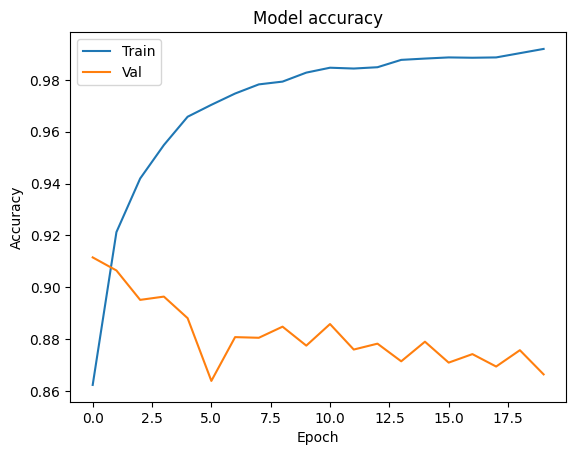

In [28]:
# Visualizing the results of evaluation
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

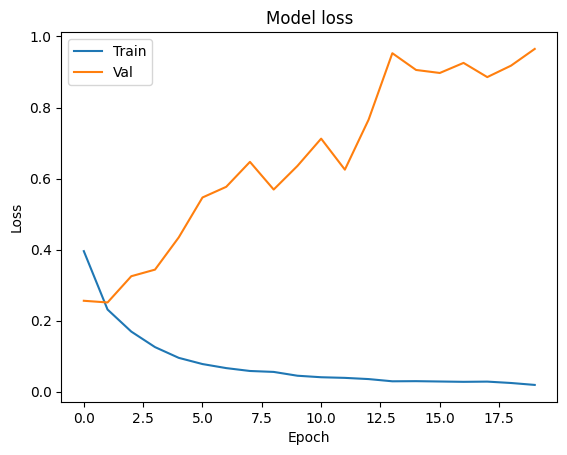

In [29]:
# Visualizing the results of evaluation
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

In [30]:
# Saving the model
model.save('hate_speech_model.h5')

In [31]:
# Saving the tokenizer
import pickle
with open('tokenizer.pkl', 'wb') as handle:
    pickle.dump(tokenizer, handle, protocol=pickle.HIGHEST_PROTOCOL)

In [32]:
# Defining function to predict the class
def predict_tweet(tweet):
    tweet = clean_tweet(tweet)
    tweet = preprocess_tweet(tweet)
    sequence = tokenizer.texts_to_sequences([tweet])
    padded_sequence = pad_sequences(sequence, maxlen=max_len)
    prediction = model.predict(padded_sequence)
    return prediction

In [33]:
# Test case
if __name__ == "__main__":
    example_tweet = "Input any text you want"
    prediction = predict_tweet(example_tweet)
    predicted_class = prediction.argmax(axis=1)[0]
    class_names = {0: 'Hate Speech', 1: 'Offensive Language', 2: 'Neither'}
    print(f'Predicted class: {class_names[predicted_class]}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 345ms/step
Predicted class: Neither
